In [48]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [49]:
#loading dataset
df = pd.read_csv("Final_nrd_Prop_compn.csv")

In [50]:
df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,M,N,P,Q,R,S,T,V,W,Y
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.018571,0.051429,0.041429,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.008571,0.025714,0.018571,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.015714,0.064286,0.051429,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.008571,0.025714,0.030000,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.008571,0.032857,0.032857,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143


In [51]:
df.shape

(2747, 152)

In [52]:
df.Class.value_counts()

Carb      1111
CGC        693
Hetero     500
DNA        280
RNA        163
Name: Class, dtype: int64

In [53]:
RNA_df = df[(df['Class'] == 'RNA') | (df['Class'] == 'CGC')]

In [54]:
#Carb_df

In [55]:
RNA_df["target"] = np.where(RNA_df["Class"].str.contains("CGC"), 1, 0)

C:\Users\Senthil\AppData\Local\Temp/ipykernel_6428/2515966794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RNA_df["target"] = np.where(RNA_df["Class"].str.contains("CGC"), 1, 0)


In [56]:
RNA_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,N,P,Q,R,S,T,V,W,Y,target
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.034286,0.052857,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.057143,0.128571,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.060000,0.132857,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.021429,0.018571,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.052857,0.050000,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1


In [57]:
# X -> features, y -> label
y=RNA_df['target']
X=RNA_df.drop(['Class','Entry','target'],axis=1)

In [58]:
print(f'X : {X.shape}')

X : (856, 150)


In [59]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state = 230,stratify = y)

In [60]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')     

X_train: (684, 150)
y_train: (684,)
X_test: (172, 150)
y_test: (172,)


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [63]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132, 147, 162, 177, 193, 208, 223, 238, 254, 269, 284, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [92]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [93]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [94]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=55,
                                              random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132,
                                          147, 162, 177, 193, 208, 223, 238,
                                          254, 269, 284, 300]},
             verbose=2)

In [95]:
best_rf_params = rf_Grid.best_params_
best_rf_params

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 55}

In [96]:
rf_Model = rf_Grid.best_estimator_

In [97]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 55}

In [98]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=55, random_state=42)

In [99]:
rf_Model.feature_importances_

array([0.00239509, 0.00616816, 0.00637819, 0.01296241, 0.        ,
       0.01037893, 0.00543157, 0.00138331, 0.00012928, 0.00105388,
       0.        , 0.        , 0.01046311, 0.00686344, 0.00104653,
       0.00113495, 0.00131969, 0.00214212, 0.00088843, 0.00159488,
       0.0005992 , 0.00068277, 0.00022718, 0.00323724, 0.00054425,
       0.00107752, 0.0104604 , 0.00222612, 0.00054126, 0.00423911,
       0.00115031, 0.        , 0.01093792, 0.00108818, 0.00650581,
       0.00129485, 0.00403055, 0.        , 0.00334734, 0.00647842,
       0.0115681 , 0.00043705, 0.        , 0.00070202, 0.        ,
       0.00292804, 0.00276477, 0.00420062, 0.00114168, 0.        ,
       0.01445282, 0.00778738, 0.00145855, 0.00689969, 0.00303152,
       0.00024065, 0.0002227 , 0.00046897, 0.        , 0.00490193,
       0.00269525, 0.00445743, 0.0002955 , 0.00448597, 0.00062283,
       0.00806286, 0.00630896, 0.00355055, 0.        , 0.00582888,
       0.        , 0.01090987, 0.00068603, 0.00118375, 0.00949

In [100]:
imp_feat=pd.DataFrame({'Feature_Name' : X.columns.tolist(), 'Feature_Importance' : rf_Model.feature_importances_})

In [101]:
imp_feat.sort_values(by = 'Feature_Importance', ascending=False, inplace = True)

In [102]:
imp_feat.head(21)

,Feature_Name,Feature_Importance
145,S,0.069648
135,G,0.048446
143,Q,0.046324
132,C,0.045470
136,H,0.041588
137,I,0.036776
141,N,0.027621
139,L,0.026220
146,T,0.025003
138,K,0.024318


In [103]:
imp_feat.to_csv('RNA_Feature_importance.csv', index = False)

In [104]:
y_train_prediction = rf_Model.predict(X_train)
y_test_prediction = rf_Model.predict(X_test)

In [105]:
from sklearn.metrics import classification_report
print ('---------Train')
print(classification_report(y_train,y_train_prediction))
print ('---------Test')
print(classification_report(y_test,y_test_prediction))

---------Train
              precision    recall  f1-score   support

           0       0.97      0.46      0.62       130
           1       0.89      1.00      0.94       554

    accuracy                           0.89       684
   macro avg       0.93      0.73      0.78       684
weighted avg       0.90      0.89      0.88       684

---------Test
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        33
           1       0.90      0.98      0.94       139

    accuracy                           0.90       172
   macro avg       0.88      0.76      0.80       172
weighted avg       0.89      0.90      0.89       172



In [106]:
clf_report_train = pd.DataFrame(classification_report(y_train,y_train_prediction, output_dict=True)).transpose().reset_index()
clf_report_train['Model'] = 'Train'

clf_report_test = pd.DataFrame(classification_report(y_test,y_test_prediction, output_dict=True)).transpose().reset_index()
clf_report_test['Model'] = 'Test'

clf_report = pd.concat([clf_report_train,clf_report_test]) 
clf_report.to_csv('RNA_Clf_Report.csv', index = False)
clf_report

,index,precision,recall,f1-score,support,Model
0,0,0.967742,0.461538,0.625000,130.000000,Train
1,1,0.887460,0.996390,0.938776,554.000000,Train
2,accuracy,0.894737,0.894737,0.894737,0.894737,Train
3,macro avg,0.927601,0.728964,0.781888,684.000000,Train
4,weighted avg,0.902718,0.894737,0.879140,684.000000,Train
0,0,0.857143,0.545455,0.666667,33.000000,Test
1,1,0.900662,0.978417,0.937931,139.000000,Test
2,accuracy,0.895349,0.895349,0.895349,0.895349,Test
3,macro avg,0.878903,0.761936,0.802299,172.000000,Test
4,weighted avg,0.892313,0.895349,0.885886,172.000000,Test


In [107]:
y_train_predpro = rf_Model.predict_proba(X_train)[:,1]
y_test_predpro = rf_Model.predict_proba(X_test)[:,1]

In [108]:
y_train_pred = rf_Model.predict(X)

In [109]:
y_train_predpro = rf_Model.predict_proba(X)[:,1]

In [110]:
RNA_df.shape

(856, 155)

In [111]:
RNA_df['y_train_pred']=y_train_pred

C:\Users\Senthil\AppData\Local\Temp/ipykernel_6428/4102033714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RNA_df['y_train_pred']=y_train_pred


In [112]:
RNA_df['y_train_predpro']=y_train_predpro

C:\Users\Senthil\AppData\Local\Temp/ipykernel_6428/2288896638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RNA_df['y_train_predpro']=y_train_predpro


In [113]:
RNA_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,Q,R,S,T,V,W,Y,target,y_train_pred,y_train_predpro
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1,1,0.872831
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1,1,0.927852
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1,1,0.928877
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1,1,0.794658
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1,1,0.805696


C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


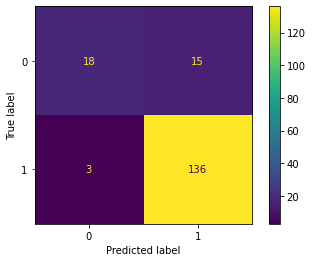

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rf_Model, X_test, y_test)

In [115]:
sensitivity = 21/(21+12)
sensitivity

0.6363636363636364

In [116]:
specificity = 138/(138+1)
specificity

0.9928057553956835

In [117]:
specificity+sensitivity

1.6291693917593197

In [118]:
precision = 21/(21+1)
precision

0.9545454545454546

In [119]:
f1 = (precision * sensitivity)/(precision+sensitivity)
f1

0.38181818181818183

C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


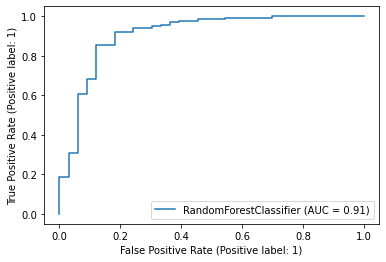

In [120]:
plot_roc_curve(rf_Model, X_test, y_test)  